In [ ]:
#Creating a scatter plot that shows how the tumor volume changes over time for each treatment. 
#Creating a scatter plot that shows how the number of metastatic 
#    (https://en.wikipedia.org/wiki/Metastasis) (cancer spreading) sites changes over time for each treatment. 
#Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate) 
#Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

#Questions to answer
# 1.  How does my Data Frame need to be structured for me to have the right X and Y axis?
# 2.  How do I build a basic scatter plot?
# 3.  How do I add a label to that scatter plot?
# 4.  Where would the labels for that scatter plot originate? 

# Requirements (Assumptions & Considerations)
# Use the Pandas Library, Jupyter Notebook and Matplotlib library. 
# Include a written description of three observable trends based on the data. 
# Use proper labeling of your plots, including the following aspects: 
#       Plot Titles, Axes Labels, Legend Labels, X and Y Axis Limits, etc. 
# 
# Scatter plots must include error bars (https://en.wikipedia.org/wiki/Error_bar). 
# This will allow the company to account for variability between mice. 
# look into pandas.DataFrame.sem (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sem.html) 
# for ideas on how to calculate error bars. 
# Remember when making your plots to consider aesthetics!
# Legends should not be overlaid on top of any data. 
# Bar graph should indicate tumor growth as red and tumor reduction as green. 
# It should also include a label with the percentage change for each bar. 
# Consult tutorial (http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-chartswith-matplotlib/) 
# for relevant code snippets.
# See Starter Workbook (Pymaceuticals/pymaceuticals_starter.ipynb) for a reference on expected format. 
# (Note: For this example, you are not required to match the tables or data frames included. 
# Your only goal is to build the scatter plots and bar graphs. 


In [121]:
from stats import mean, median, mode, multi_mode
%matplotlib notebook
import random
import collections



In [122]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [123]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mousedrug_data = pd.read_csv("data/mouse_drug_data.csv", low_memory=False)
trial_data = pd.read_csv("data/clinicaltrial_data.csv", low_memory=False)



In [124]:
trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [125]:
mousedrug_data.head()


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [126]:
# Combine the data into a single dataset
pymaceu_df = pd.merge(mousedrug_data, trial_data, on="Mouse ID")


In [127]:
# Display the data table for preview
pymaceu_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [128]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
pymaceu_df.describe()




,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1906.000000,1906.000000,1906.000000
mean,19.538300,50.468120,1.018363
std,14.064786,8.869571,1.135991
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.991921,1.000000
75%,30.000000,56.288484,2.000000
max,45.000000,78.567014,4.000000


In [129]:
# Using GroupBy - store the mean tumor volume data grouped by drug and timepoint
grouped_data = pymaceu_df.groupby(['Drug', 'Timepoint']).mean()["Tumor Volume (mm3)"]

grouped_data.head()



Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
Name: Tumor Volume (mm3), dtype: float64

In [130]:
grouped_df=pd.DataFrame(grouped_data)

In [131]:
grouped_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [ ]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame

In [132]:
grouped_standerr=pymaceu_df.groupby(['Drug', 'Timepoint']).sem()["Tumor Volume (mm3)"]

In [133]:
grouped_standerr.head()

Drug       Timepoint
Capomulin  0            0.000000
           5            0.448593
           10           0.702684
           15           0.838617
           20           0.909731
Name: Tumor Volume (mm3), dtype: float64

In [134]:
grouped_standerr_df=pd.DataFrame(grouped_standerr)

In [135]:
grouped_standerr_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked

In [136]:
#changing the group_df
grouped_df=grouped_df.reset_index()

In [138]:
#combine the two dataframes using pvolt
pivot_munging_df=grouped_df.pivot(index="Timepoint",columns="Drug")["Tumor Volume (mm3)"]


In [55]:
pivot_munging_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [139]:
grouped_standerr_df=grouped_standerr_df.reset_index()
pivot_stdmunging_df=grouped_standerr_df.pivot(index="Timepoint",columns="Drug")["Tumor Volume (mm3)"]





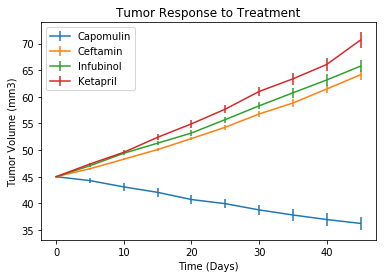

In [140]:
#lines = {'linestyle': 'None'}
#plt.rc('lines', **lines)

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
drug_one=plt.errorbar(pivot_munging_df.index, pivot_munging_df["Capomulin"], yerr=pivot_stdmunging_df["Capomulin"])
drug_two=plt.errorbar(pivot_munging_df.index, pivot_munging_df["Ceftamin"], yerr=pivot_stdmunging_df["Ceftamin"])
drug_three=plt.errorbar(pivot_munging_df.index, pivot_munging_df["Infubinol"], yerr=pivot_stdmunging_df["Infubinol"])
drug_four=plt.errorbar(pivot_munging_df.index, pivot_munging_df["Ketapril"], yerr=pivot_stdmunging_df["Ketapril"])
             
# Create a legend for our chart
plt.legend(handles=[drug_one,drug_two,drug_three,drug_four], loc="best")
plt.savefig('tumorresponse.jpg')
plt.show()

## Metastatic Response to Treatment

In [141]:
grouped_df=grouped_df.reset_index()

In [142]:

# Using GroupBy - store the mean tumor volume data grouped by drug and timepoint
grouped_data = pymaceu_df.groupby(['Drug', 'Timepoint']).mean()["Metastatic Sites"]
grouped_data.head()

Drug       Timepoint
Capomulin  0            0.000000
           5            0.160000
           10           0.320000
           15           0.375000
           20           0.652174
Name: Metastatic Sites, dtype: float64

In [143]:
grouped_df=pd.DataFrame(grouped_data)
grouped_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [144]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

grouped_data_metstanderr=pymaceu_df.groupby(['Drug','Timepoint']).sem()["Metastatic Sites"]
grouped_data_metstanderr_df=pd.DataFrame(grouped_data_metstanderr) 
grouped_data_metstanderr_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [145]:
grouped_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111
          25                 1.500000
          30                 1.937500
          35                 2.071429
          40                 2.357143
          45                 2.692308
Infubinol 0                  0.000000
          5                  0.280000
          10                 0.666667
          15                 0.904762
          20                 1.050000
          25                 1.277778
          30                 1.588235
          35                 1.666667
          40                 2.100000
          45                 2.111111
...                               ...
Ramicane  0                  0.000000
          5                  0.120000
          10                 0.250000
          15                 0.333333
          20                 0.347826
          25                 0.652174
          30                 0.782609
          35                 0.952381
          40                 1.100000
          45                 1.250000
Stelasyn  0                  0.000000
          5                  0.240000
          10                 0.478261
          15                 0.782609
          20                 0.952381
          25                 1.157895
          30                 1.388889
          35                 1.562500
          40                 1.583333
          45                 1.727273
Zoniferol 0                  0.000000
          5                  0.166667
          10                 0.500000
          15                 0.809524
          20                 1.294118
          25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [146]:

#changing the group_df for data munging
grouped_df1=grouped_df.reset_index()

In [147]:
grouped_df1

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [148]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
#combine the two dataframes using pvolt
pivot_munging_df=grouped_df1.pivot(index="Timepoint",columns="Drug")["Metastatic Sites"]

In [149]:
pivot_munging_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [150]:
grouped_data_metstanderr_df1=grouped_data_metstanderr_df.reset_index()

In [151]:
pivot_stdmunging_df=grouped_data_metstanderr_df1.pivot(index="Timepoint",columns="Drug")["Metastatic Sites"]


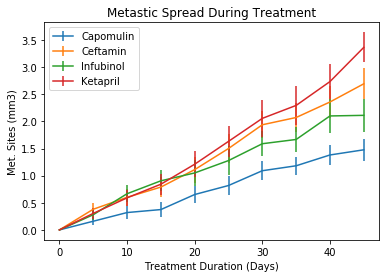

In [152]:
#lines = {'linestyle': 'None'}
#plt.rc('lines', **lines)

plt.title("Metastic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites (mm3)")
drug_one=plt.errorbar(pivot_munging_df.index, pivot_munging_df["Capomulin"], yerr=pivot_stdmunging_df["Capomulin"])
drug_two=plt.errorbar(pivot_munging_df.index, pivot_munging_df["Ceftamin"], yerr=pivot_stdmunging_df["Ceftamin"])
drug_three=plt.errorbar(pivot_munging_df.index, pivot_munging_df["Infubinol"], yerr=pivot_stdmunging_df["Infubinol"])
drug_four=plt.errorbar(pivot_munging_df.index, pivot_munging_df["Ketapril"], yerr=pivot_stdmunging_df["Ketapril"])
             
# Create a legend for our chart
plt.legend(handles=[drug_one,drug_two,drug_three,drug_four], loc="best")
plt.savefig('metastic-treatment2.jpg')
plt.show()

## Survival Rates

In [153]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame

grouped_micecount=pymaceu_df.groupby(['Drug', 'Timepoint']).count()["Tumor Volume (mm3)"]
grouped_micecount.head()

Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
Name: Tumor Volume (mm3), dtype: int64

In [154]:
grouped_micecount_df=pd.DataFrame(grouped_micecount)
grouped_micecount_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                          25
          5                          25
          10                         25
          15                         24
          20                         23

In [155]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

grouped_data = pymaceu_df.groupby(['Drug', 'Timepoint']).mean()["Metastatic Sites"]
grouped_data.head()


Drug       Timepoint
Capomulin  0            0.000000
           5            0.160000
           10           0.320000
           15           0.375000
           20           0.652174
Name: Metastatic Sites, dtype: float64

In [156]:
grouped_micecount_df=pd.DataFrame(grouped_micecount)
grouped_micecount_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                          25
          5                          25
          10                         25
          15                         24
          20                         23

In [157]:
grouped_micecount_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                          25
          5                          25
          10                         25
          15                         24
          20                         23
          25                         22
          30                         22
          35                         22
          40                         21
          45                         21
Ceftamin  0                          25
          5                          21
          10                         20
          15                         19
          20                         18
          25                         18
          30                         16
          35                         14
          40                         14
          45                         13
Infubinol 0                          25
          5                          25
          10                         21
          15                         21
          20                         20
          25                         18
          30                         17
          35                         12
          40                         10
          45                          9
...                                 ...
Ramicane  0                          25
          5                          25
          10                         24
          15                         24
          20                         23
          25                         23
          30                         23
          35                         21
          40                         20
          45                         20
Stelasyn  0                          26
          5                          25
          10                         23
          15                         23
          20                         21
          25                         19
          30                         18
          35                         16
          40                         12
          45                         11
Zoniferol 0                          25
          5                          24
          10                         22
          15                         21
          20                         17
          25                         16
          30                         15
          35                         14
          40                         14
          45                         14

[100 rows x 1 columns]

In [158]:

grouped_micecount_df=grouped_micecount_df.reset_index()
#grouped_df=grouped_df.reset_index()
pivot_micedmunging_df=grouped_micecount_df.pivot(index="Timepoint",columns="Drug")["Tumor Volume (mm3)"]


In [159]:
pivot_micedmunging_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


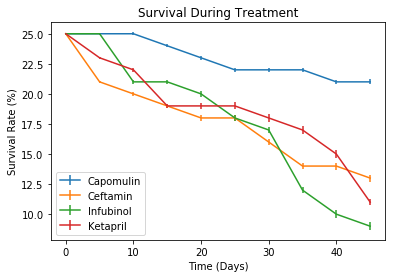

In [160]:
# Generate the Plot (with Error Bars)
# Save the Figure
# Show the Figure

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
drug_one=plt.errorbar(pivot_micedmunging_df.index, pivot_micedmunging_df["Capomulin"], yerr=pivot_stdmunging_df["Capomulin"])
drug_two=plt.errorbar(pivot_micedmunging_df.index, pivot_micedmunging_df["Ceftamin"], yerr=pivot_stdmunging_df["Ceftamin"])
drug_three=plt.errorbar(pivot_micedmunging_df.index, pivot_micedmunging_df["Infubinol"], yerr=pivot_stdmunging_df["Infubinol"])
drug_four=plt.errorbar(pivot_micedmunging_df.index, pivot_micedmunging_df["Ketapril"], yerr=pivot_stdmunging_df["Ketapril"])
             
# Create a legend for our chart
plt.legend(handles=[drug_one,drug_two,drug_three,drug_four], loc="best")
plt.savefig('survival-treatment.jpg')
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [161]:
pymaceu_df

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


In [162]:
pymaceu_df.columns

Index(['Mouse ID', 'Drug', 'Timepoint', 'Tumor Volume (mm3)',
       'Metastatic Sites'],
      dtype='object')

In [163]:
pymaceu_df["Drug"].value_counts()

Capomulin    230
Ramicane     228
Stelasyn     194
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug, dtype: int64

In [164]:
pivot_munging_df=pymaceu_df.pivot_table(index='Timepoint',columns="Drug")["Tumor Volume (mm3)"]

In [100]:
#combine the two dataframes using pvolt
#pymaceu_df = pd.merge(mousedrug_data, trial_data, on="Mouse ID")
#pivot_munging_df=pymaceu_df.pivot(index="Timepoint",columns="Drug")["Tumor Volume (mm3)"]


In [165]:
pivot_munging_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [166]:
percentdif=100*(pivot_munging_df.iloc[-1]-pivot_munging_df.iloc[0])/pivot_munging_df.iloc[0]

In [167]:
percentdif

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [168]:
tuplepercent=(percentdif['Capomulin'],percentdif['Infubinol'],percentdif['Ketapril'], percentdif['Placebo']) 

In [169]:
tuplepercent

(-19.475302667894173, 46.12347172785188, 57.028794686606076, 51.29796048315153)

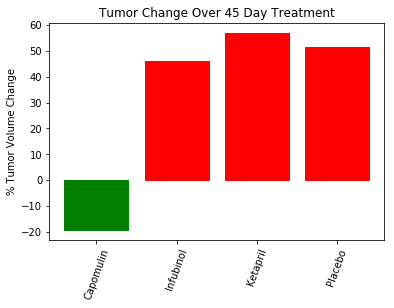

In [171]:

drug4=[('Capomulin', -19.4753), ('Infubinol', 46.1234), ('Ketapril', 57.0287), ('Placebo',51.2979)]
barlist=plt.bar(range(len(drug4)), [val[1] for val in drug4], align='center')
plt.xticks(range(len(drug4)), [val[0] for val in drug4])
plt.xticks(rotation=70)
barlist[0].set_color('g')
barlist[1].set_color('r')
barlist[2].set_color('r')
barlist[3].set_color('r')
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
frequencies=[-19.47, 46.12,57.03, 51.3]
freq_series=pd.Series.from_array(frequencies)
#ax=freq_series.plot(kind='bar')
plt.savefig('tumorchange2.jpg')
plt.show()
#plt.get.savefig('/Homework/05-Matplotlib/tumorchange.pdf')
#fig.savefig(‘/Homework/tumorchange.pdf’)     
#fig.savefig("tumorchange.pdf")
